In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

import pandas as pd
sns.set_theme(rc={"figure.dpi":100, 'savefig.dpi':300,})
plt.style.use('seaborn-whitegrid')
from plot_utils import data_dict_icml
import plot_utils

/tmp/ipykernel_7495/2846130715.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
2024-05-11 01:29:42.979635: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-11 01:29:43.923098: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
envs = ["Acrobot-v1", "CartPole-v1", "MountainCar-v0", "LunarLander-v2", "Pendulum-v1"]
seeds = [237, 379, 482, 672, 886]
algos = ["ppo"]
# seeds = [237, 379, 482, 672]
data = data_dict_icml(algos=algos, envs=envs, seeds=seeds)

FileNotFoundError: [Errno 2] No such file or directory: 'results/icml/Pendulum-v1/icml_3600_4_ppo_2400_237.csv'

In [ ]:
def create_plot_data(method, env, seeds, ax):
    plot_data = pd.DataFrame()

    for seed in seeds:
        plot_data = pd.concat([plot_data, data[method][env][seed][[ax]]], axis=1)
        # mean of accumulated reward
    mean = plot_data.mean(axis=1)
    std = plot_data.std(axis=1)
    
    plot_data["mean"] = mean
    plot_data["std"] = std
    plot_data["episode"] = plot_data.index
    return plot_data

def plot(methods, env, seeds, ax, p=plt):
    
    for method in methods:
        plot_data = create_plot_data(method, env, seeds, ax)
        p.plot(plot_data["episode"], plot_data["mean"], label=method)
        p.fill_between(plot_data["episode"], plot_data["mean"] - plot_data["std"], plot_data["mean"] + plot_data["std"], alpha=0.2)
        # add legend
        p.legend()

    # p.ticklabel_format(axis='both', style='scientific', scilimits=(-10,10))


        
    # if plt is the default plt
    if p == plt:
        p.xlabel("Episode")
        p.ylabel(ax[0].upper() + ax[1:])
        p.title(f"{env} - {ax}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            p.ylim(0, 1)
    else:
        p.set_xlabel("Episode")
        p.set_ylabel(ax[0].upper() + ax[1:])
        p.set_title(f"{env} - {ax}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            p.set_ylim(0, 1)


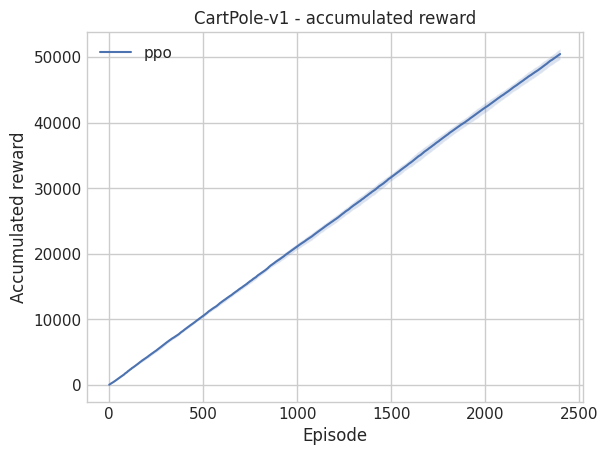

In [ ]:
plot(algos, "CartPole-v1", seeds, "accumulated reward")

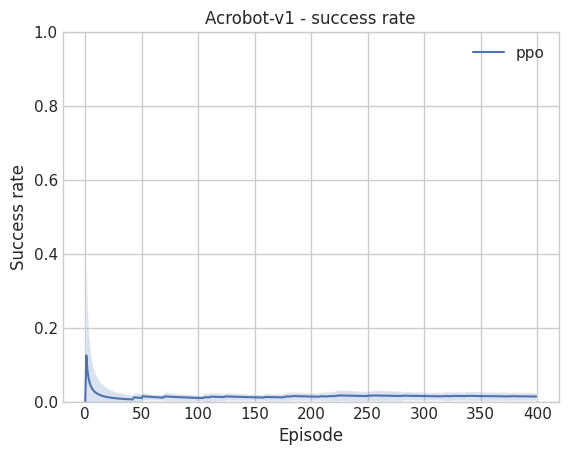

In [ ]:
plot(algos, "Acrobot-v1", seeds, "success rate")

In [ ]:
def create_plot_grid(methods, envs, seeds, ax):
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))

    # add margin bewteen subplots
    fig.subplots_adjust(hspace = 0.4)

    # add title to the whole plot
    # fig.suptitle("Comparing abstraction methods on " + ax)

    for i, env in enumerate(envs):
        plot(methods, env, seeds, ax, axs[i // 3][i % 3])
        
    #save the plot as svg
    plt.savefig(f"images/{ax}.pdf", bbox_inches='tight', format='pdf')
    plt.show()



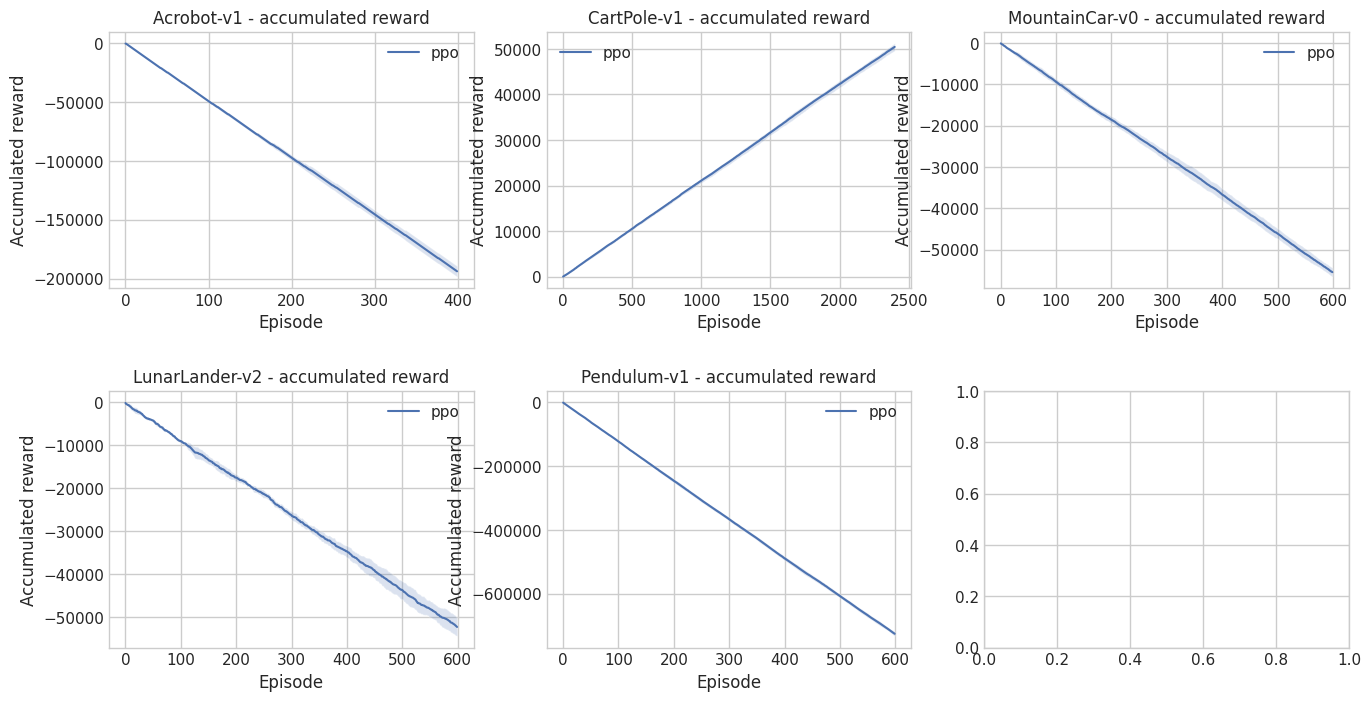

In [ ]:
create_plot_grid(algos, envs, seeds, "accumulated reward")


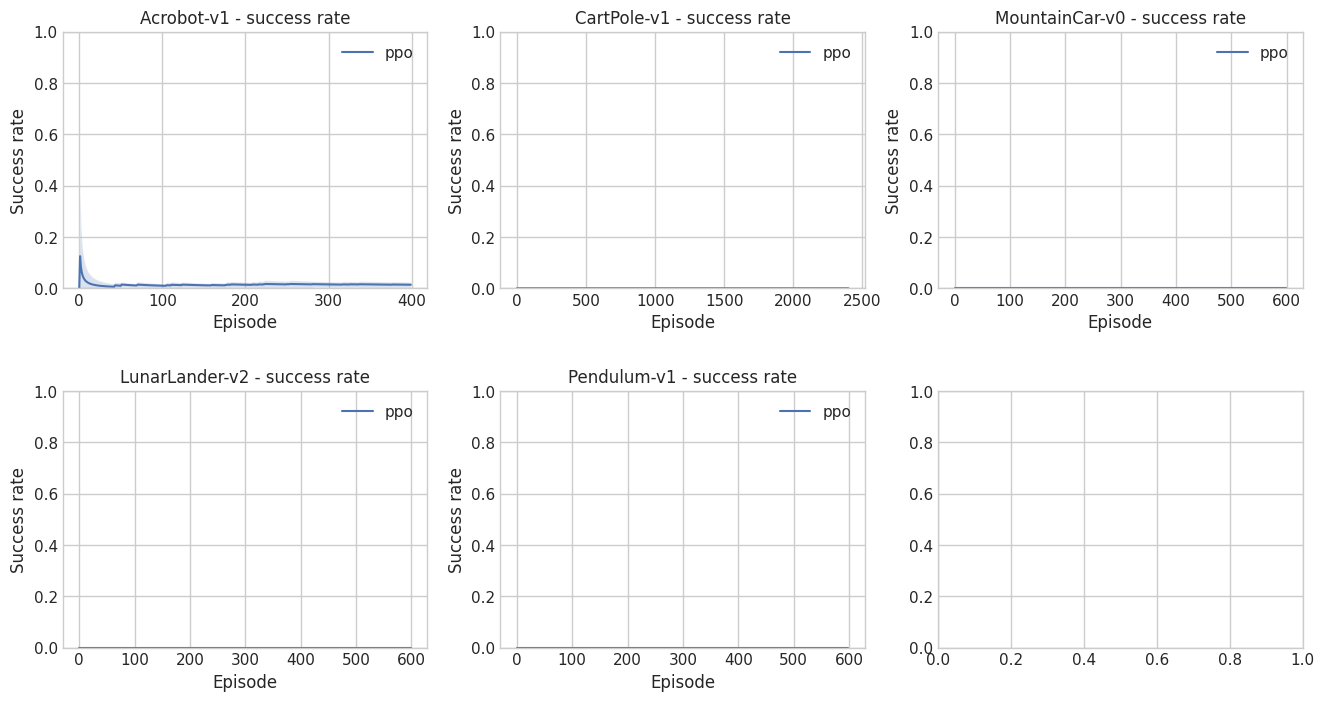

In [ ]:
create_plot_grid(algos, envs, seeds, "success rate")

In [2]:
import glob


def load_datas_icml(env: str):
    
    path = f"results/icml/{env}/*"
    for name in glob.glob(path):
        # if the file does not contain info in name
        if "info" not in name:
            print(name)
            data = pd.read_csv(name)
            # add column for accumulated reward
            data['accumulated reward'] = data['rewards'].cumsum()

            # add column for success rate
            data['success rate'] = data['success'].mean()

In [8]:
# load data for k bins
algos = ["ppo"]
envs = ["MountainCarContinuous-v0", "Pendulum-v1"]
bins = [2, 4, 8, 10, 25, 50]
dataKBins = {}
for algo in algos:
    dataKBins[algo] = {}
    for env in envs:
        dataKBins[algo][env] = {}
        for bin in bins:
            path = f"results/icml/{env}/*"
            for name in glob.glob(path):
                # if the file does not contain info in name
                if "info" not in name:
                    print(name)
                    data = pd.read_csv(name)
                    # add column for accumulated reward
                    data['accumulated reward'] = data['rewards'].cumsum()

                    # add column for success rate
                    data['success rate'] = data['success'].mean()
                    dataKBins[algo][env][bin] = data

results/icml/MountainCarContinuous-v0/icml_600_25_ppo_400_435.csv
results/icml/MountainCarContinuous-v0/icml_600_8_ppo_400_913.csv
results/icml/MountainCarContinuous-v0/icml_600_50_ppo_400_808.csv
results/icml/MountainCarContinuous-v0/icml_600_4_ppo_400_154.csv
results/icml/MountainCarContinuous-v0/icml_600_10_ppo_400_138.csv
results/icml/MountainCarContinuous-v0/icml_600_2_ppo_400_882.csv
results/icml/MountainCarContinuous-v0/icml_600_25_ppo_400_435.csv
results/icml/MountainCarContinuous-v0/icml_600_8_ppo_400_913.csv
results/icml/MountainCarContinuous-v0/icml_600_50_ppo_400_808.csv
results/icml/MountainCarContinuous-v0/icml_600_4_ppo_400_154.csv
results/icml/MountainCarContinuous-v0/icml_600_10_ppo_400_138.csv
results/icml/MountainCarContinuous-v0/icml_600_2_ppo_400_882.csv
results/icml/MountainCarContinuous-v0/icml_600_25_ppo_400_435.csv
results/icml/MountainCarContinuous-v0/icml_600_8_ppo_400_913.csv
results/icml/MountainCarContinuous-v0/icml_600_50_ppo_400_808.csv
results/icml/Moun

,Unnamed: 0,success,times,rewards,steps,accumulated reward,success rate
0,0,0,0.045461,-1104.65858,200,-1.104659e+03,0.0
1,1,0,0.161481,-1125.17628,200,-2.229835e+03,0.0
2,2,0,0.207242,-821.79935,200,-3.051634e+03,0.0
3,3,0,0.251832,-1627.48344,200,-4.679118e+03,0.0
4,4,0,0.296194,-1211.10279,200,-5.890220e+03,0.0
...,...,...,...,...,...,...,...
2395,2395,0,124.954212,-1053.83584,200,-2.885721e+06,0.0
2396,2396,0,125.012131,-1537.29485,200,-2.887259e+06,0.0
2397,2397,0,125.068674,-1075.05998,200,-2.888334e+06,0.0
2398,2398,0,125.123806,-1290.47819,200,-2.889624e+06,0.0


In [16]:
# plot each bin for each method in each env
def plot_k_bins(algo, env, bins, ax):

    for bin in bins:
        plot_data = dataKBins[algo][env][bin]

        plt.plot(plot_data.index, plot_data["accumulated reward"], label=f"{bin} bins")

        # add legend
        plt.legend()
        plt.xlabel("Episode")
        plt.ylabel(ax[0].upper() + ax[1:])
        plt.title(f"{env}-{algo}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            plt.ylim(0, 1)

    plt.show()

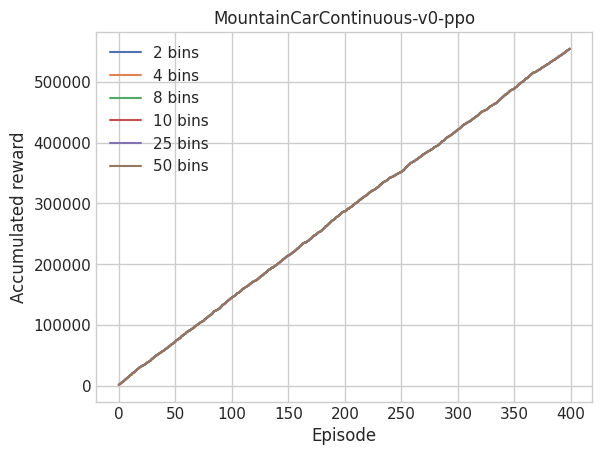

In [17]:
plot_k_bins("ppo", envs[0], bins, "accumulated reward")

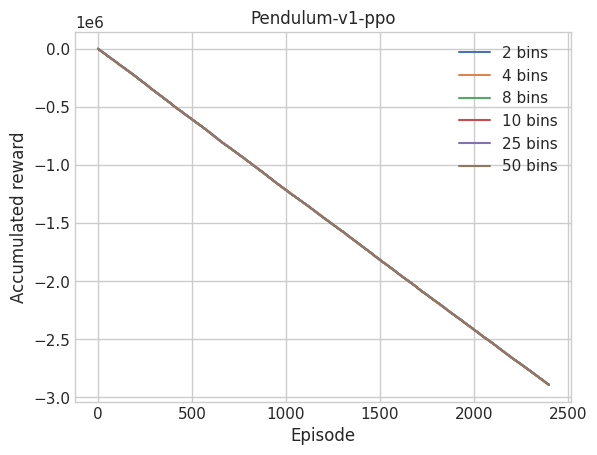

In [18]:
plot_k_bins("ppo", envs[1], bins, "accumulated reward")
